In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_mks = pd.read_csv("errs_allMksModels.csv", index_col=0)
df_cnn = pd.read_csv("errs_allStepModels.csv", index_col=0)
df_cnc = pd.read_csv("errs_bestModel_conc.csv", index_col=0)

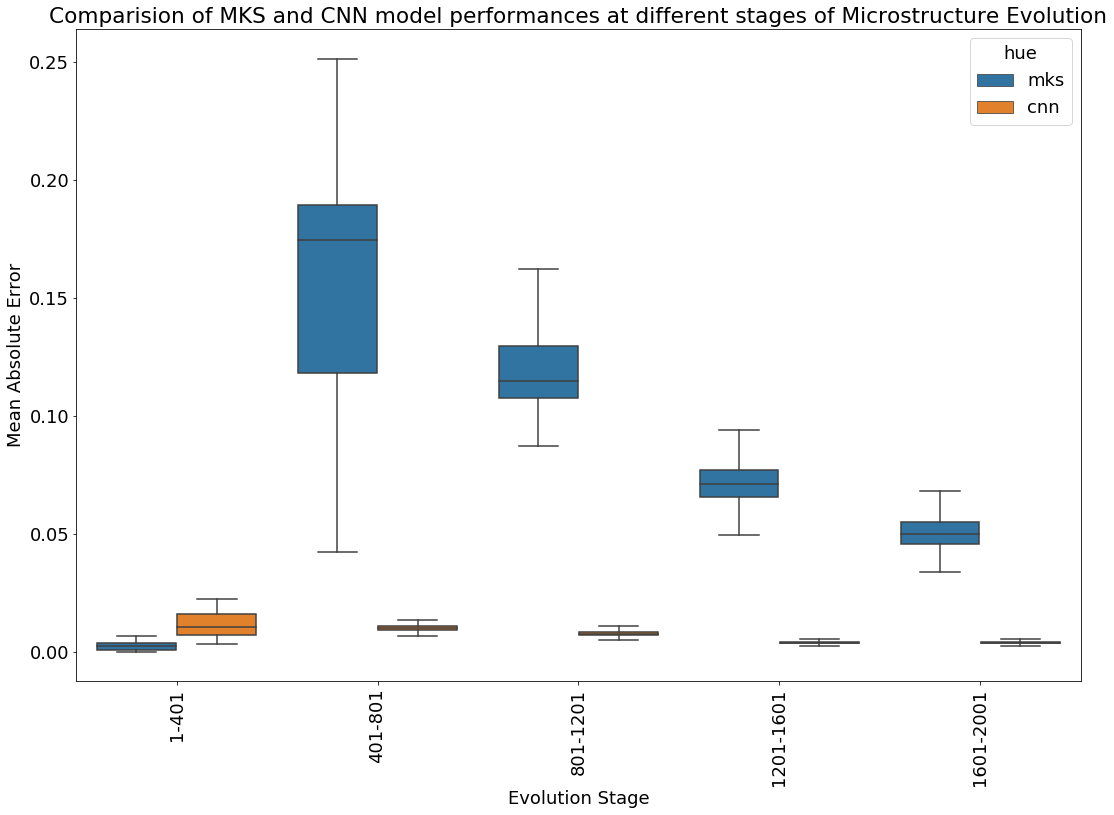

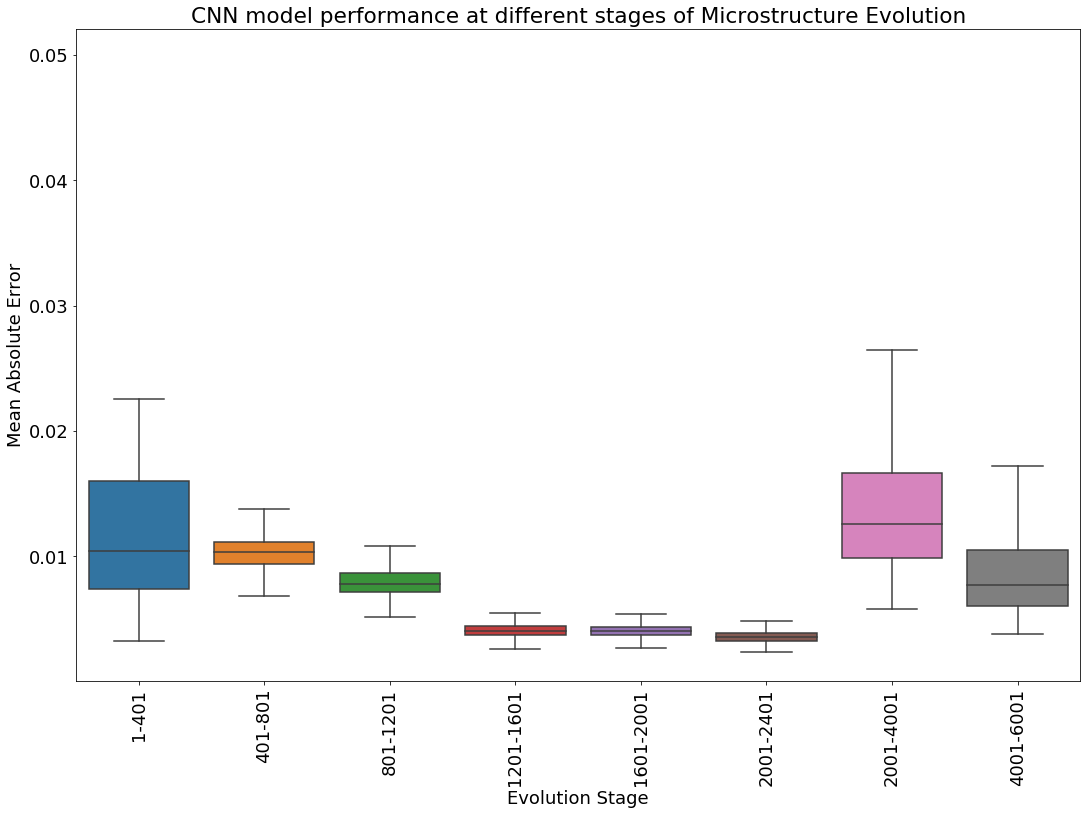

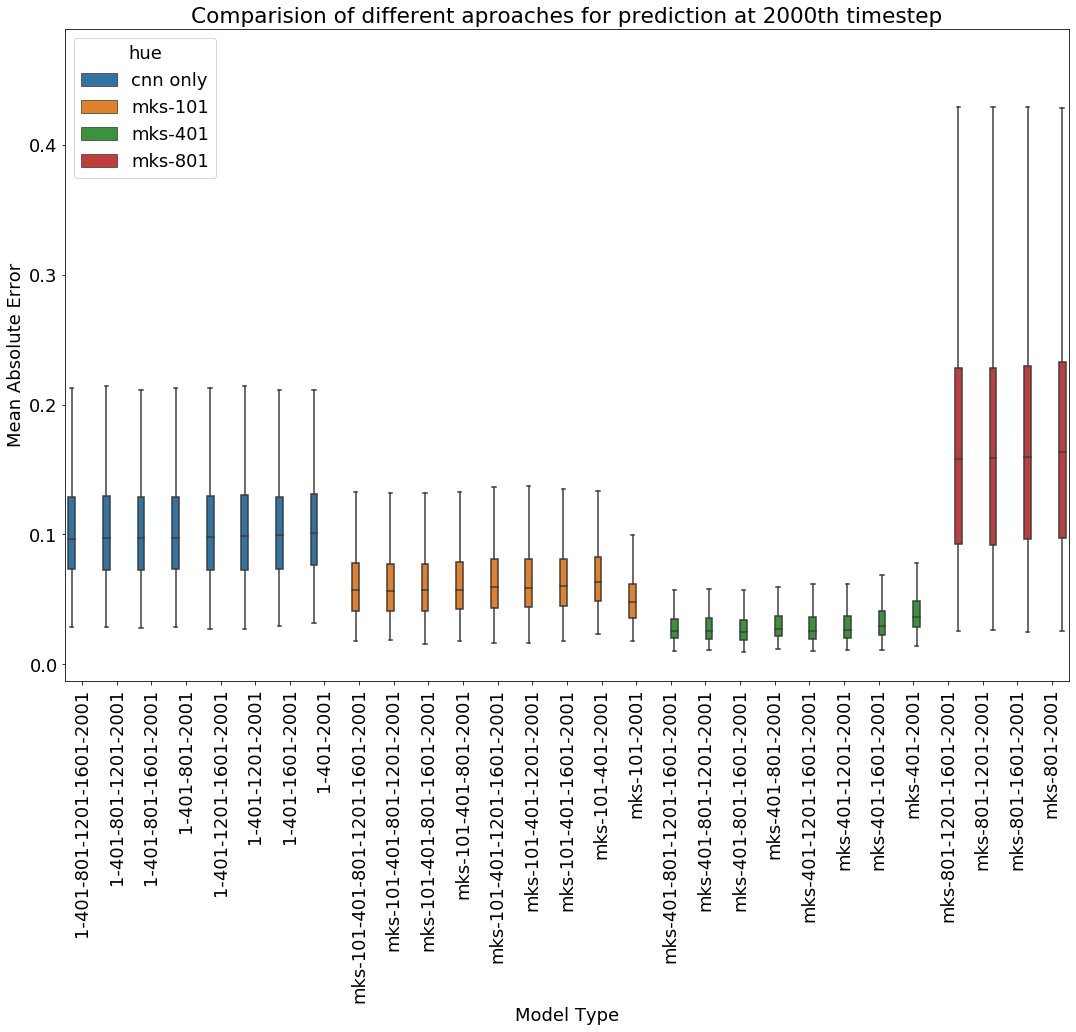

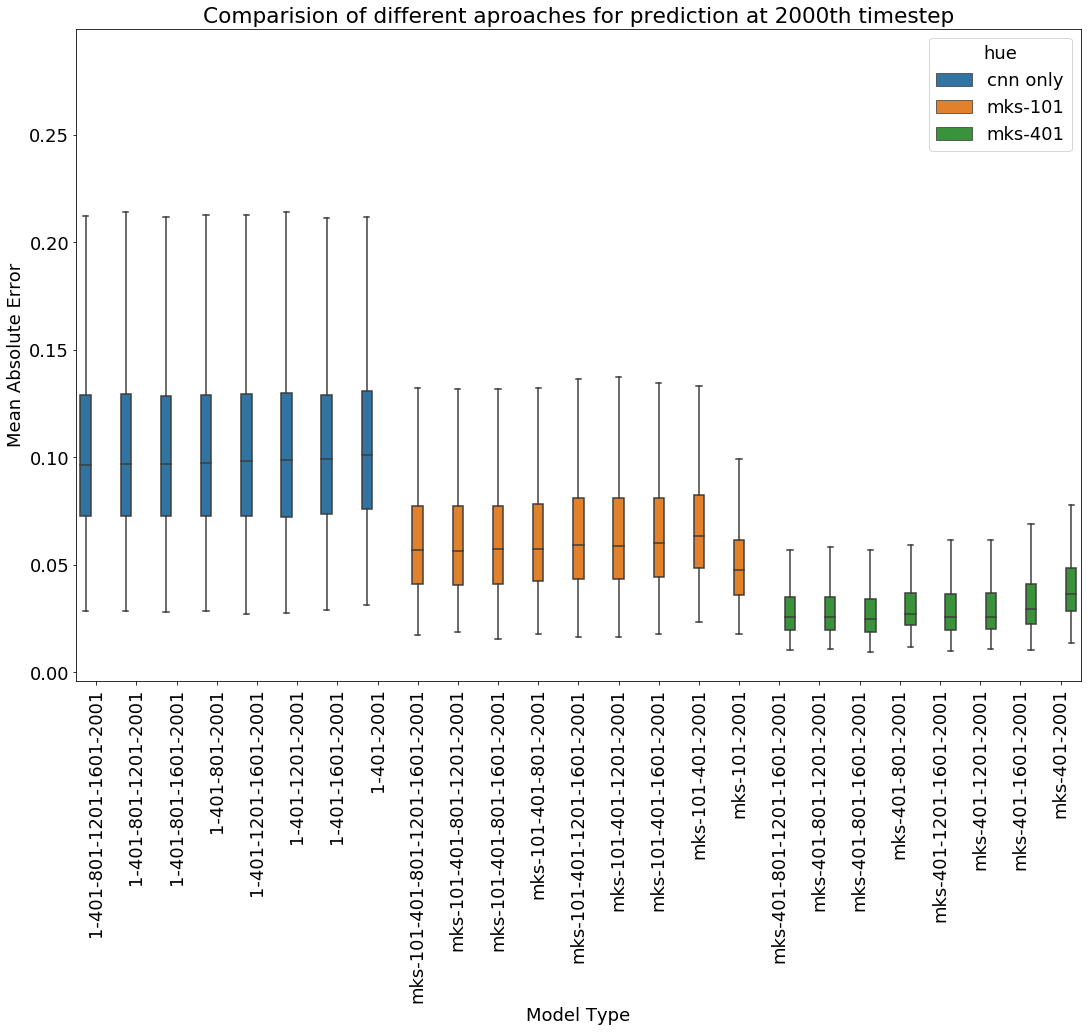

In [3]:
plt.rcParams.update({'font.size': 18})
cnn_cols = ["1-401", "401-801", "801-1201", "1201-1601", "1601-2001"]
mks_cols = ["MKS "+cl for cl in cnn_cols]

df0 = df_mks[mks_cols]
df1 = df_cnn[cnn_cols]
df0.columns = df1.columns
df = pd.concat([pd.melt(df0), pd.melt(df1)], axis=0)
df["hue"] = ["mks"]*len(pd.melt(df0)) + ["cnn"]*len(pd.melt(df1))

plt.figure(figsize=(18,12))
sns.boxplot(x="variable", y="value", data=df, hue="hue", fliersize=0)
plt.xticks(rotation = 90)
plt.title("Comparision of MKS and CNN model performances at different stages of Microstructure Evolution")
plt.xlabel("Evolution Stage")
plt.ylabel("Mean Absolute Error")
plt.show()

plt.figure(figsize=(18,12))
sns.boxplot(data=df_cnn[cnn_cols+ ["2001-2401", "2001-4001", "4001-6001"]], fliersize=0)
plt.xticks(rotation=90)
plt.title("CNN model performance at different stages of Microstructure Evolution")
plt.xlabel("Evolution Stage")
plt.ylabel("Mean Absolute Error")
plt.show()

cols = list(df_cnn.columns)[23:]
hues = ["cnn only"] * 8 * 1024 + ["mks-101"] * 9 * 1024 + ["mks-401"] * 8 * 1024 + ["mks-801"] * 4 * 1024
df_plot = pd.melt(df_cnn[cols])
df_plot["hue"] = hues

plt.figure(figsize=(18,12))
sns.boxplot(x="variable", y="value", data=df_plot, hue="hue", fliersize=0)
plt.xticks(rotation=90)
plt.title("Comparision of different aproaches for prediction at 2000th timestep")
plt.xlabel("Model Type")
plt.ylabel("Mean Absolute Error")
plt.show()

cols = list(df_cnn.columns)[23:-4]
hues = ["cnn only"] * 8 * 1024 + ["mks-101"] * 9 * 1024 + ["mks-401"] * 8 * 1024
df_plot = pd.melt(df_cnn[cols])
df_plot["hue"] = hues


plt.figure(figsize=(18,12))
sns.boxplot(x="variable", y="value", data=df_plot, hue="hue", fliersize=0)
plt.xticks(rotation=90)
plt.title("Comparision of different aproaches for prediction at 2000th timestep")
plt.xlabel("Model Type")
plt.ylabel("Mean Absolute Error")
plt.show()

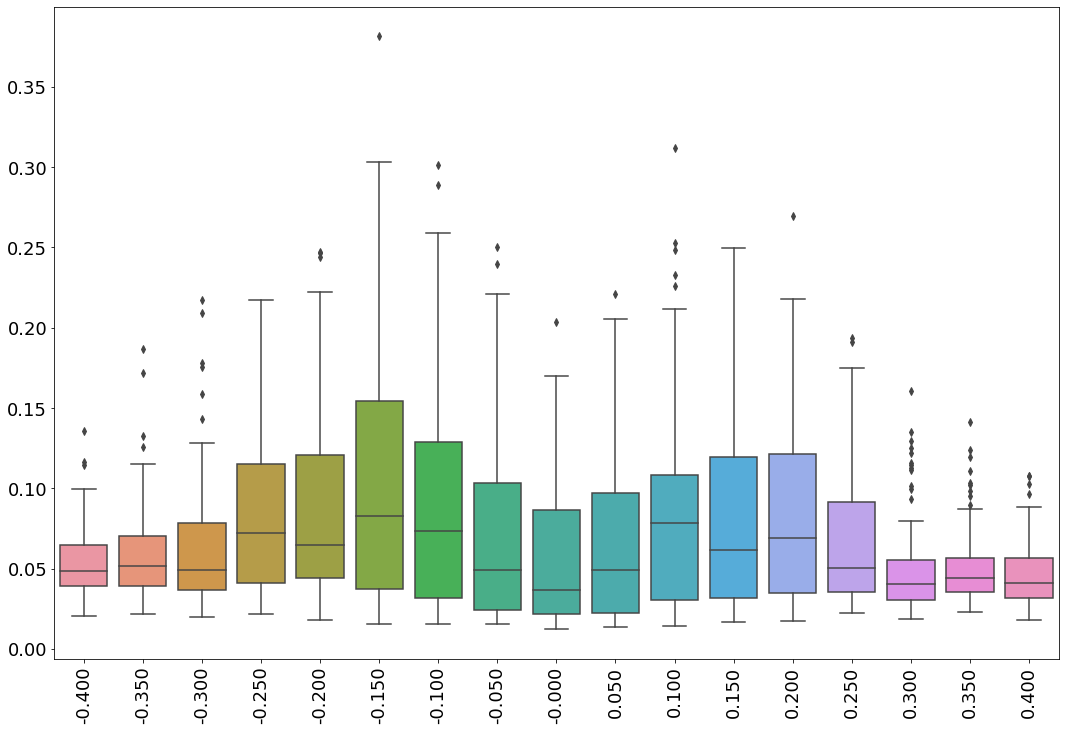

In [4]:
plt.figure(figsize=(18,12))
sns.boxplot(data=df_cnc[df_cnc.columns[2:-2]])
plt.xticks(rotation = 90)
plt.show()